In [60]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import matplotlib

In [61]:
def pyramid_plot(df1, df2, ylabels, k_pr, fig=None, nolegend=False, **kwargs):  
    index = ylabels
    df1 = pd.DataFrame(df1, index=index)
    df2 = pd.DataFrame(df2, index=index)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()
    axes[0].invert_xaxis()
    
    #space between plots
    plt.subplots_adjust(wspace = 0.2)
    #remove tick marks on y axis
    axes[0].tick_params(left=False)
    axes[0].set_xlim(.27,0)
    df1.plot.barh(ax=axes[0], edgecolor='white', width = 0.7, linewidth=.8)
    yax = axes[0].get_yaxis()
    axes[0].set_yticklabels(ylabels, ha = 'right')
    yax.set_tick_params(pad=2)
    axes[0].set_title(label=r'$\psi$')
    df2.plot.barh(ax=axes[1], edgecolor='white', width = 0.7, linewidth=.8)
    axes[1].set_title(label=r'Performance')
    axes[1].set_yticklabels(ylabels, ha = 'left')
    axes[1].axes.get_yaxis().set_visible(False)
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles[::-1], labels[::-1])
    axes[1].set_xlim(0,1.1)
    #some veritcal lines on right plot
    plt.axvline(x=.7126, ls="--", linewidth = 0.9, color="blue")
    plt.axvline(x=.9954, ls="--", linewidth = 1, color="orange")
    plt.axvline(x=.9344, ls="--", linewidth = 0.9, color="red")

    #ungrouped label for y of right plot
    for i, p in enumerate(axes[1].patches):
        axes[1].annotate(k_pr[i], (0, p.get_y()), xytext=(-45, 6), textcoords='offset pixels', horizontalalignment='center', verticalalignment="center")

    axes[1].get_legend().remove()
    plt.tick_params(left = False)
    if nolegend:
        axes[0].get_legend().remove()
    
    axes[0].yaxis.grid(False)
    axes[1].yaxis.grid(True)

    
    return fig


In [62]:
def pyramid_plot(df1, df2, ylabels, k_pr, delta_perf, fig=None, nolegend=False, **kwargs):  
    index = ylabels
    df1 = pd.DataFrame(df1, index=index)
    df2 = pd.DataFrame(df2, index=index)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    #fig.tight_layout()
    axes[0].invert_xaxis()
    
    #space between plots
    plt.subplots_adjust(wspace = 0.25)
    #remove tick marks on y axis
    axes[0].tick_params(left=False)
    axes[0].set_xlim(.27,0)
    df1.plot.barh(ax=axes[0], edgecolor='white', width = 0.7, linewidth=.8)
    yax = axes[0].get_yaxis()
    axes[0].set_yticklabels(ylabels, ha = 'right', fontsize=12)
    yax.set_tick_params(pad=1)
    axes[0].set_title(label=r'$\psi$', fontsize=13)
    df2.plot.barh(ax=axes[1], edgecolor='white', width = 0.7, linewidth=.8)
    axes[1].set_title(label=r'Accuracy', fontsize=13)
    axes[1].set_yticklabels(ylabels, ha = 'left')
    axes[1].axes.get_yaxis().set_visible(False)
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles[::-1], labels[::-1], prop={"size":11})
    axes[1].set_xlim(0,1.1)
    #some veritcal lines on right plot
    #plt.axvline(x=.7126, ls="--", linewidth = 0.9, color="blue")
    #plt.axvline(x=.9954, ls="--", linewidth = 1, color="orange")
    #plt.axvline(x=.9344, ls="--", linewidth = 0.9, color="red")

    #ungrouped label for y of right plot
    for i, p in enumerate(axes[1].patches):
        axes[1].annotate(k_pr[i], (0, p.get_y()), xytext=(-35, 10), textcoords='offset pixels', horizontalalignment='center', verticalalignment="center", fontsize="12")

    for i, p in enumerate(axes[1].patches):
        axes[1].annotate(delta_perf[i], (0, p.get_y()), xytext=(+3, 10), textcoords='offset pixels', horizontalalignment='left', verticalalignment="center", fontsize="12")
        
    axes[1].get_legend().remove()
    plt.tick_params(left = False)
    if nolegend:
        axes[0].get_legend().remove()
        
        
    axes[0].set_xticks([0, 0.05, .1, .15,.2])
    axes[1].set_xticks([0, 0.25, .5, .75,1])
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[1].tick_params(axis='both', which='major', labelsize=12)


    axes[0].yaxis.grid(False)
    axes[1].yaxis.grid(True)

    
    return fig


In [63]:
meths_dense = ["uCWS", "uPWS", "uUQ", "uECSQ", "SLR", "Pr-uCWS", "Pr-uPWS", "Pr-uUQ", "Pr-uECSQ"][::-1]

In [64]:
c100 =.7126
c10 = .9344
mn = .9954

In [65]:
best_perf_dense = {"CIFAR100": np.array([0.7170,0.7126,0.7170,0.7171,0.7125,0.7172,0.7156,0.7178,0.7178][::-1]),
                   "CIFAR10":np.array([0.9367,0.9368,0.9370,0.9369,0.9343,0.9365,0.9366,0.9363,0.9365][::-1]),
                   "MNIST":np.array([0.9957,0.9955,0.9955,0.9957,0.9955,0.9955,0.9955,0.9954,0.9954][::-1])}
best_perf_dense_space = {"CIFAR100": np.array([0.1525,0.1216,0.0563,0.2055,0.1067,0.1682,0.0109,0.0057,0.0056][::-1]),
                   "CIFAR10":np.array([0.2468,0.1212,0.0355,0.0801,0.0238,0.0338,0.0617,0.0057,0.0754][::-1]),
                   "MNIST":np.array([0.1467,0.1544,0.0559,0.0949,0.0238,0.0777,0.0807,0.0057,0.0276][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["32","64","32","128","128","40-256","98-32","99-32","99-32"][::-1],
                   ["256","16","32","16","32","95-32","60-16","99-16","60-16"][::-1],
                   ["32","32","128","16","32","60-16","60-32","99-32","95-16"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(best_perf_dense["CIFAR100"]-c100),
                                          list(best_perf_dense["CIFAR10"]-c10),
                                          list(best_perf_dense["MNIST"]-mn)])]

<Figure size 640x480 with 0 Axes>

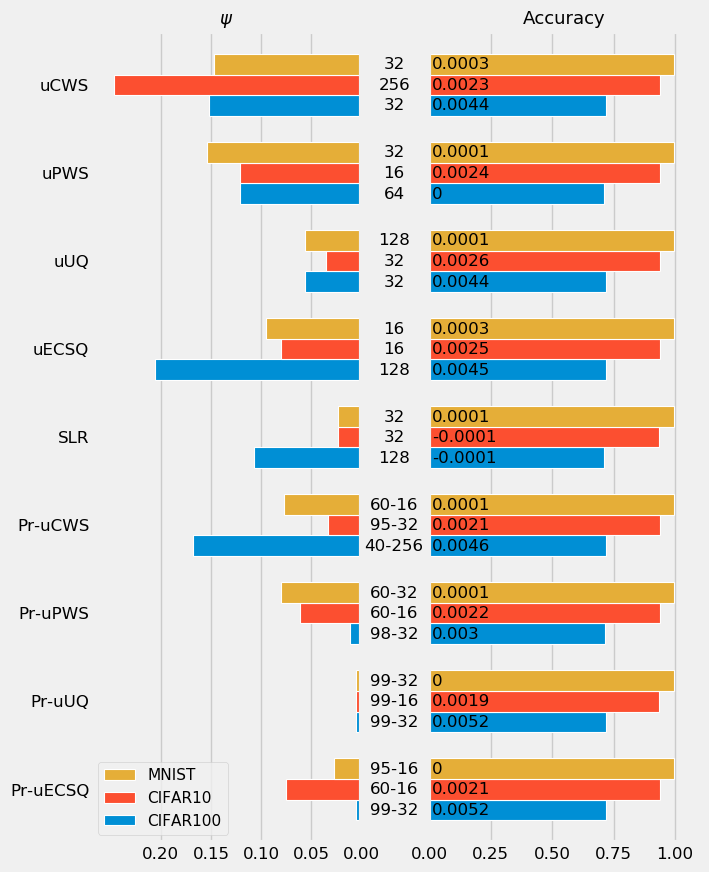

In [66]:
pyrfig = plt.figure(1)
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4)
pyrfig.set_figwidth(7)

pyrfig.set_figheight(10)

plt.show(pyrfig)
pyrfig.savefig('plots/classification/best_perf_on_dense.png', bbox_inches='tight')

In [67]:
best_perf_dense = {"CIFAR100": np.array([0.7166,0.7126,0.7156,0.7163,0.7125,0.7156,0.7156,0.7170,0.7173][::-1]),
                   "CIFAR10":np.array([0.9355,0.9363,0.9370,0.9368,0.9343,0.9361,0.9344,0.9363,0.9363][::-1]),
                   "MNIST":np.array([0.9954,0.9955,0.9955,0.9957,0.9955,0.9954,0.9955,0.9954,0.9954][::-1])}
best_perf_dense_space = {"CIFAR100": np.array([0.0313,0.1216,0.0390,0.0799,0.1067,0.0108,0.0109,0.0056,0.0055][::-1]),
                   "CIFAR10":np.array([0.0313,0.0313,0.0355,0.0472,0.0238,0.0055,0.0055,0.0056,0.0055][::-1]),
                   "MNIST":np.array([0.1215,0.1544,0.0559,0.0949,0.0238,0.0577,0.0807,0.0057,0.0276][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["2","64","16","16","128","98-64","98-32","99-16","99-16"][::-1],
                   ["2","2","32","2","32","99-32","99-32","99-16","99-32"][::-1],
                   ["16","32","128","16","32","80-64","60-32","99-32","95-16"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(best_perf_dense["CIFAR100"]-c100),
                                          list(best_perf_dense["CIFAR10"]-c10),
                                          list(best_perf_dense["MNIST"]-mn)])]

<Figure size 640x480 with 0 Axes>

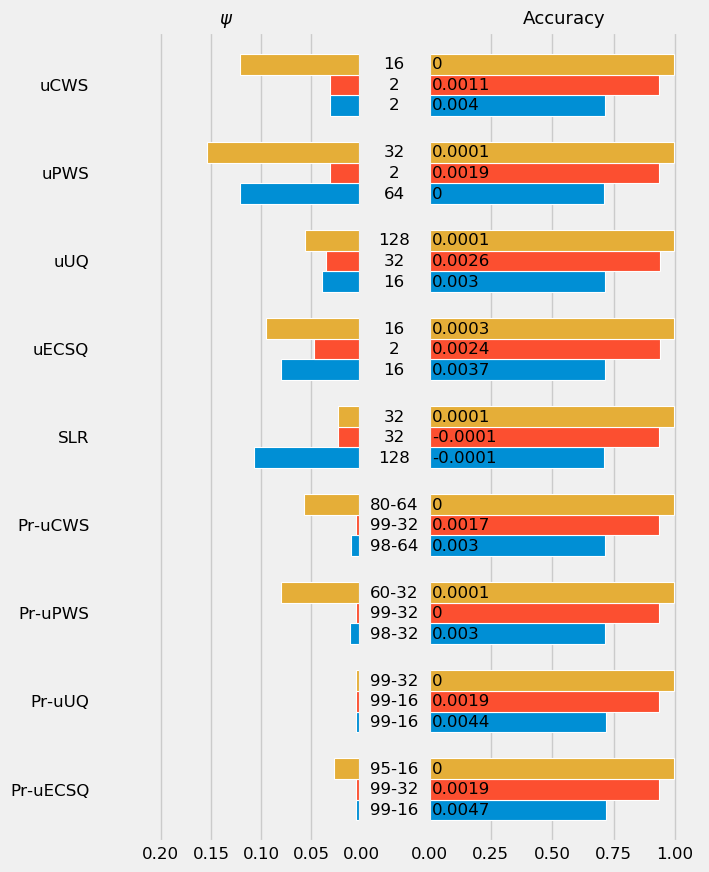

In [68]:
pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4, nolegend=True)

pyrfig.set_figwidth(7)
pyrfig.set_figheight(10)

plt.show(pyrfig)
pyrfig.savefig('plots/classification/best_space_dense.png', bbox_inches='tight')

In [69]:
meths_dense=["uCWS","uPWS","uUQ","uECSQ"][::-1]

In [70]:
best_perf_dense = {"CIFAR100": np.array([0.6891,0.5162,0.7132,0.6840][::-1]),
                   "CIFAR10":np.array([0.9196,0.9065,0.9360,0.9336][::-1]),
                   "MNIST":np.array([0.9946,0.9936,0.2106,0.9955][::-1])}
best_perf_dense_space = {"CIFAR100": np.array([0.2187,0.2500,0.2500,0.2188][::-1]),
                   "CIFAR10":np.array([0.2500,0.2500,0.2500,0.2500][::-1]),
                   "MNIST":np.array([0.2500,0.2500,0.2500,0.2500][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["128","256","256","256"][::-1],
                   ["256","256","256","256"][::-1],
                   ["256","256","256","256"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(best_perf_dense["CIFAR100"]-c100),
                                          list(best_perf_dense["CIFAR10"]-c10),
                                          list(best_perf_dense["MNIST"]-mn)])]

<Figure size 640x480 with 0 Axes>

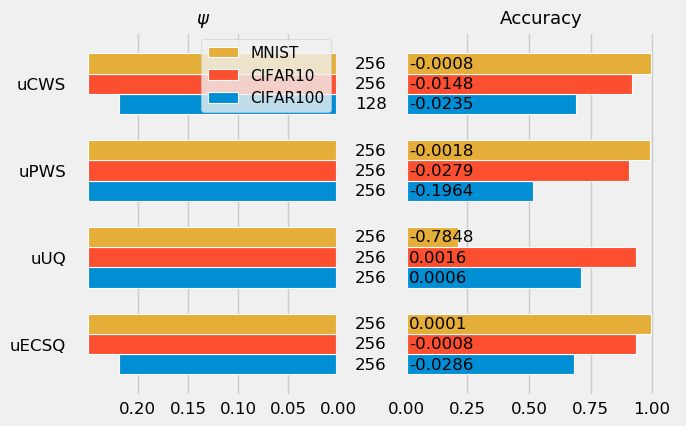

In [71]:
pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4)
pyrfig.set_figwidth(7)
pyrfig.set_figheight(4.5)
plt.show(pyrfig)
pyrfig.savefig('plots/classification/quant_on_conv.png', bbox_inches='tight')

In [72]:
meths_dense=["uCWS/Pr-uCWS","uPWS/Pr-uPWS","uUQ/Pr-uUQ","uECSQ/Pr-uECSQ","uCWS/SLR","uPWS/SLR","uUQ/SLR","uECSQ/SLR"][::-1]

In [73]:
best_perf_dense = {"CIFAR100": np.array([0.6849,0.5155,0.7128,0.6862,0.6891,0.5084,0.7113,0.6830][::-1]),
                   "CIFAR10":np.array([0.9089,0.1335,0.9331,0.9052,0.9033,0.7703,0.9362,0.9003][::-1]),
                   "MNIST":np.array([0.9955,0.9945,0.2258,0.9953,0.9954,0.9914,0.1135,0.9956][::-1])}
best_perf_dense_space = {"CIFAR100": np.array([0.1316,0.1480,0.1497,0.1419,0.1391,0.1550,0.1550,0.1571][::-1]),
                   "CIFAR10":np.array([.1611,.1315,.1420,.1544,.1080,.1507,.1507,.14012][::-1]),
                   "MNIST":np.array([0.1666,0.1375,0.1131,0.1611,0.1346,0.1401,0.1507,0.1562][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["128/90","256/92","256/90","128/95","128/64","256/64","256/64","256/32"][::-1],
                   ["256/95","256/99","256/95","256/97","32/64","256/64","256/64","256/32"][::-1],
                   ["256/90","256/97","32/90","256/95","128/64","256/32","256/64","256/32"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(best_perf_dense["CIFAR100"]-c100),
                                          list(best_perf_dense["CIFAR10"]-c10),
                                          list(best_perf_dense["MNIST"]-mn)])]

4.8


<Figure size 640x480 with 0 Axes>

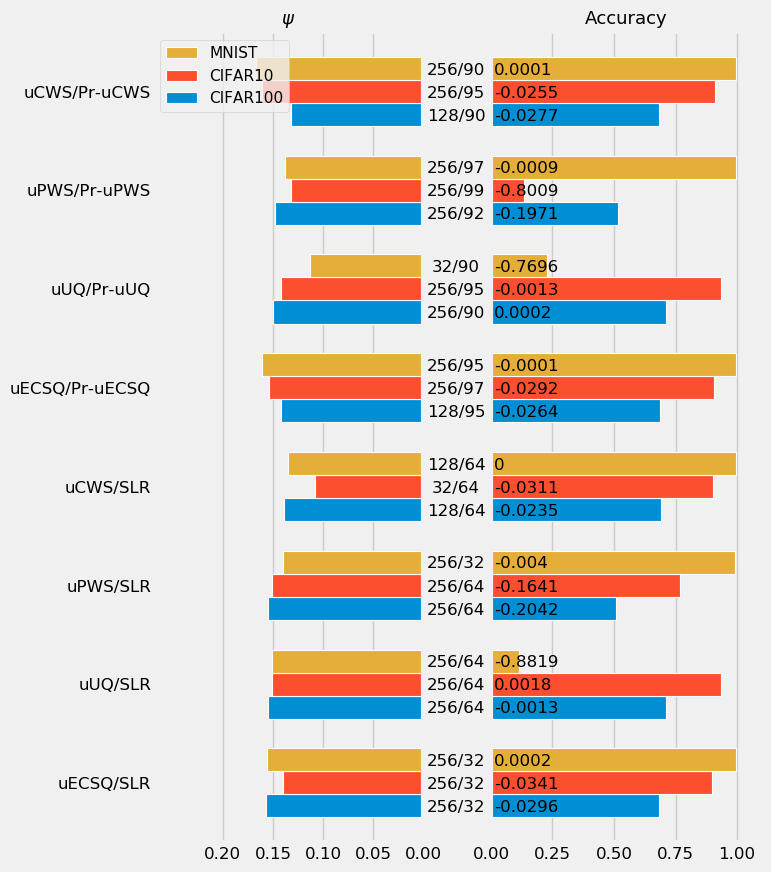

10.0


In [74]:
pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4)
print(pyrfig.get_figheight())
pyrfig.set_figwidth(7)
pyrfig.set_figheight(10)

plt.show(pyrfig)
pyrfig.savefig('plots/classification/compression_all.png', bbox_inches='tight')
print(pyrfig.get_figheight())

In [75]:
def pyramid_plot_dta(df1, df2, ylabels, k_pr, delta_perf, fig=None, nolegend=False, **kwargs):  
    index = ylabels
    df1 = pd.DataFrame(df1, index=index)
    df2 = pd.DataFrame(df2, index=index)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()
    axes[0].invert_xaxis()
    
    #space between plots
    plt.subplots_adjust(wspace = 0.25)
    #remove tick marks on y axis
    axes[0].tick_params(left=False)
    axes[0].set_xlim(.39,0)
    df1.plot.barh(ax=axes[0], color=["#b1624eff","#5cc8d7ff"], edgecolor='white', width = 0.7, linewidth=.8)
    yax = axes[0].get_yaxis()
    axes[0].set_yticklabels(ylabels, ha = 'right', fontsize=12)
    yax.set_tick_params(pad=2)
    axes[0].set_title(label=r'$\psi$', fontsize=13)
    df2.plot.barh(ax=axes[1], color=["#b1624eff","#5cc8d7ff"], edgecolor='white', width = 0.7, linewidth=.8)
    axes[1].set_title(label=r'MSE', fontsize=13)
    axes[1].set_yticklabels(ylabels, ha = 'left')
    axes[1].axes.get_yaxis().set_visible(False)
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles[::-1], labels[::-1], prop={"size":11})
    axes[1].set_xlim(0,.39)

    #ungrouped label for y of right plot
    for i, p in enumerate(axes[1].patches):
        axes[1].annotate(k_pr[i], (0, p.get_y()), xytext=(-35, 14), textcoords='offset pixels', horizontalalignment='center', verticalalignment="center", fontsize="12")

    for i, p in enumerate(axes[1].patches):
        axes[1].annotate(delta_perf[i], (0, p.get_y()), xytext=(+3, 14), textcoords='offset pixels', horizontalalignment='left', verticalalignment="center", fontsize="12")
        
    axes[1].get_legend().remove()
    plt.tick_params(left = False)
    
    if nolegend:
        axes[0].get_legend().remove()
        
        
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    
    plt.tick_params(left = False)

    axes[0].yaxis.grid(False)
    axes[1].yaxis.grid(True)

    return fig
kiba = .1756
davis = .3223

In [76]:
best_perf_dense = {"DAVIS":np.array([0.2203,0.2228,0.2204,0.2242,0.3558,0.2218,0.2269,0.2203,0.2199][::-1]),
    "KIBA": np.array([0.1600,0.1628,0.1613,0.1600,0.2325,0.1645,0.1700,0.1630,0.1645][::-1])}
best_perf_dense_space = { "DAVIS":np.array([0.1502,0.2519,0.1593,0.1967,0.3476,0.0795,0.0875,0.0675,0.0887][::-1]),
        "KIBA": np.array([0.2446,0.2519,0.1772,0.0933,0.3476,0.0791,0.0902,0.0825,0.0918][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["32","256","256","128","128","60-16","60-64","60-64","60-32"][::-1],
                   ["256","256","256","32","128","60-16","60-64","60-64","60-32"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(davis-best_perf_dense["DAVIS"]),
                                          list(kiba-best_perf_dense["KIBA"])])]

<Figure size 640x480 with 0 Axes>

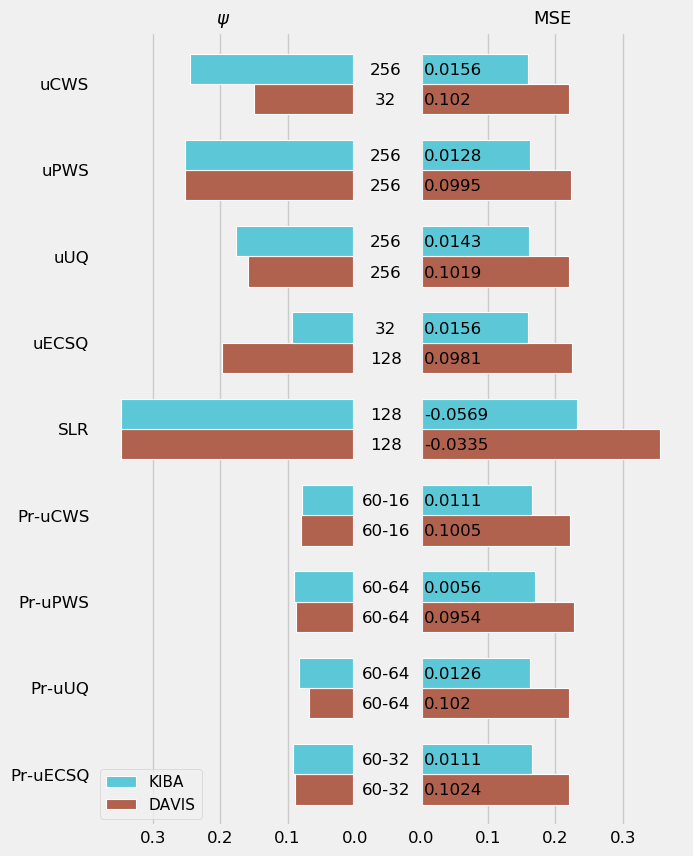

In [77]:
meths_dense = ["uCWS", "uPWS", "uUQ", "uECSQ", "SLR", "Pr-uCWS", "Pr-uPWS", "Pr-uUQ", "Pr-uECSQ"][::-1]

pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot_dta(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4)

pyrfig.set_figwidth(7)
pyrfig.set_figheight(9.375)

plt.show(pyrfig)
pyrfig.savefig('plots/regression/best_perf_on_dense.png', bbox_inches='tight')

In [78]:
best_perf_dense = {"DAVIS":np.array([0.2321,0.2581,0.2244,0.2309,0.3558,0.3037,0.3187,0.2383,0.3127][::-1]),
    "KIBA": np.array([0.1625,0.1713,0.1696,0.1631,0.2325,0.1645,0.1700,0.1698,0.1660][::-1])}
best_perf_dense_space = { "DAVIS":np.array([0.1211,0.1217,0.0959,0.1059,0.3476,0.0268,0.0159,0.0365,0.0271][::-1]),
        "KIBA": np.array([0.1197,0.1551,0.0523,0.1031,0.3476,0.0790,0.0901,0.0596,0.0766
][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["16","16","64","16","128","95-64","97-32","90-16","95-32"][::-1],
                   ["16","32","16","16","128","60-16","60-64","60-16","60-16"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(davis-best_perf_dense["DAVIS"]),
                                          list(kiba-best_perf_dense["KIBA"])])]

<Figure size 640x480 with 0 Axes>

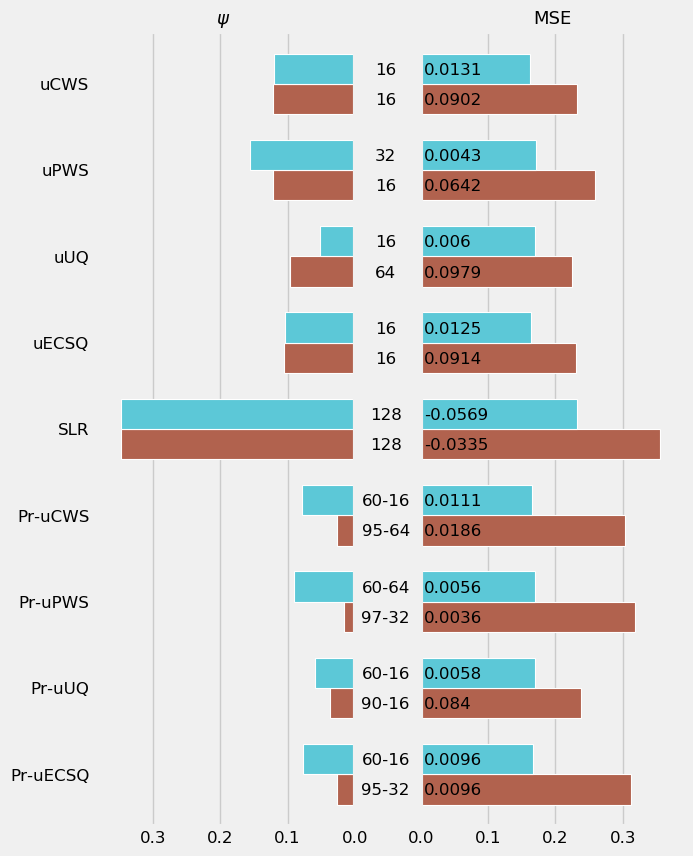

In [79]:
meths_dense = ["uCWS", "uPWS", "uUQ", "uECSQ", "SLR", "Pr-uCWS", "Pr-uPWS", "Pr-uUQ", "Pr-uECSQ"][::-1]

pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot_dta(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, nolegend=True, align='center', alpha=0.4)

pyrfig.set_figwidth(7)
pyrfig.set_figheight(9.375)

plt.show(pyrfig)
pyrfig.savefig('plots/regression/best_space_dense_dta.png', bbox_inches='tight')

In [80]:
best_perf_dense = {"DAVIS":np.array([0.2189,0.2191,0.2189,0.2204][::-1]),
    "KIBA": np.array([0.1563,0.1571,0.1568,0.1581][::-1])}
best_perf_dense_space = { "DAVIS":np.array([0.2188,0.2500,0.2500,0.2500][::-1]),
        "KIBA": np.array([0.2500,0.2500,0.2188,0.2500][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["128","256","256","256"][::-1],
                   ["256","256","128","256"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(davis-best_perf_dense["DAVIS"]),
                                          list(kiba-best_perf_dense["KIBA"])])]

meths_dense = ["uCWS", "uPWS", "uUQ", "uECSQ"][::-1]

<Figure size 640x480 with 0 Axes>

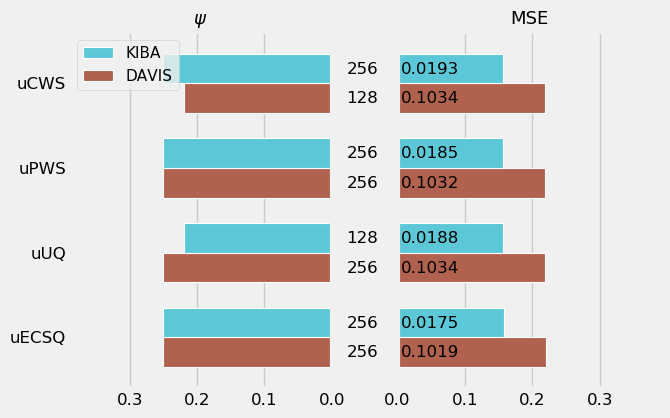

In [81]:


pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot_dta(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, align='center', alpha=0.4)

pyrfig.set_figwidth(7)
pyrfig.set_figheight(4.2)

plt.show(pyrfig)
pyrfig.savefig('plots/regression/quant_on_conv_dta.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

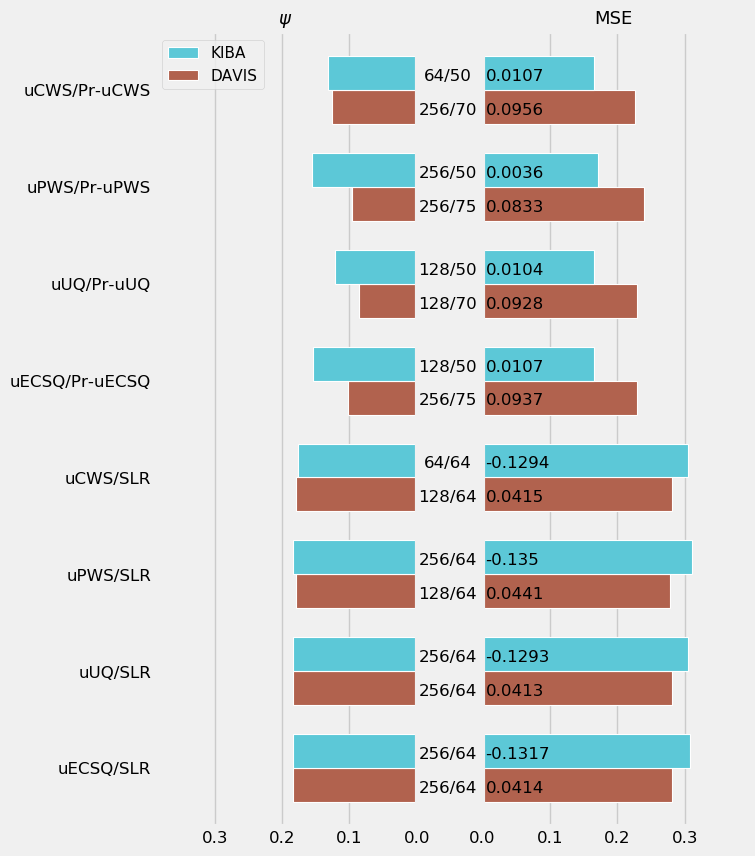

In [82]:
best_perf_dense = {"DAVIS":np.array([0.2267,0.2390,0.2295,0.2286,0.2808,0.2782,0.2810,0.2809][::-1]),
    "KIBA": np.array([0.1649,0.1720,0.1652,0.1649,0.3050,0.3106,0.3049,0.3073][::-1])}
best_perf_dense_space = { "DAVIS":np.array([0.1252,0.0965,0.0860,0.1020,0.1794,0.1794,0.1833,0.1833][::-1]),
        "KIBA": np.array([0.1320,0.1555,0.1218,0.1546,0.1756,0.1833,0.1833,0.1833][::-1])}
pr_k_perf_dense = reduce(lambda a,b:a+b,[["256/70","256/75","128/70","256/75","128/64","128/64","256/64","256/64"][::-1],
                   ["64/50","256/50","128/50","128/50","64/64","256/64","256/64","256/64"][::-1]])
delta_perf_dense = [round(x,4) if x!= 0 else int(0) for x in reduce(lambda a,b:a+b,[list(davis-best_perf_dense["DAVIS"]),
                                          list(kiba-best_perf_dense["KIBA"])])]
meths_dense=["uCWS/Pr-uCWS","uPWS/Pr-uPWS","uUQ/Pr-uUQ","uECSQ/Pr-uECSQ","uCWS/SLR","uPWS/SLR","uUQ/SLR","uECSQ/SLR"][::-1]
pyrfig = plt.figure(1)
import matplotlib
matplotlib.style.use('fivethirtyeight') 
pyrfig = pyramid_plot_dta(best_perf_dense_space, best_perf_dense, meths_dense, pr_k_perf_dense, delta_perf_dense, pyrfig, nolegend=False, align='center', alpha=0.4)

pyrfig.set_figwidth(7)
pyrfig.set_figheight(9.375)

plt.show(pyrfig)
pyrfig.savefig('plots/regression/compression_all_dta.png', bbox_inches='tight')